In [7]:
import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [56]:
# load keras model
from keras.models import load_model


model = load_model('Models\emotion_detection_LSTM_1.keras')
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 256)               264192    
                                                                 
 flatten_6 (Flatten)         (None, 256)               0         
                                                                 
 dropout_16 (Dropout)        (None, 256)               0         
                                                                 
 dense_15 (Dense)            (None, 128)               32896     
                                                                 
 dropout_17 (Dropout)        (None, 128)               0         
                                                                 
 dense_16 (Dense)            (None, 64)                8256      
                                                                 
 dropout_18 (Dropout)        (None, 64)               

In [57]:
from IPython.display import Audio
def waveplot(data, sr, title):
    plt.figure(figsize=(10,4))
    plt.title(title, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def plot_audio(path):
    data, sampling_rate = librosa.load(path)
    waveplot(data, sampling_rate, path)


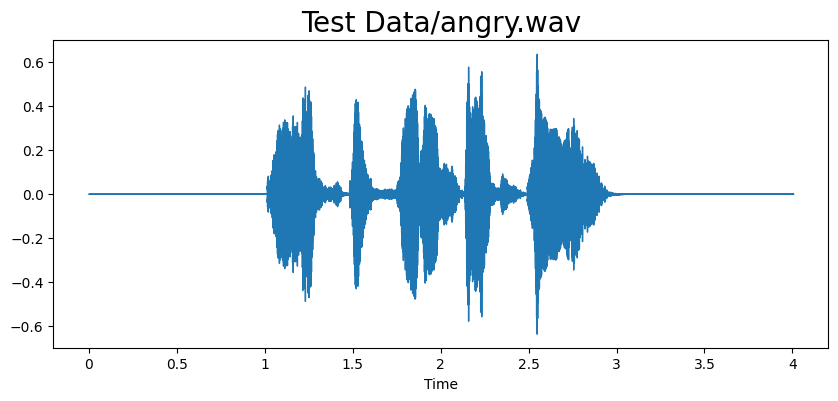

In [63]:
sad_example = 'Test Data\sad.wav'
angry_example = 'Test Data/angry.wav'
# load audio file
plot_audio(angry_example)
Audio(angry_example)

In [59]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

def predict_emotion(file):
    result_map = ['angry', 'disgust', 'fearful', 'happy', 'neutral', 'sad', 'surprised']
    mfcc = extract_mfcc(file)
    mfcc = np.expand_dims(mfcc, -1)
    y = model.predict(np.array([mfcc]))
    y = np.argmax(y, axis=1)[0]
    return result_map[y]


In [62]:
predict_emotion(angry_example)

1/1 [==============================] - 0s 19ms/step
2


'fear'